<b>¡Hola Rodrigo!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Antención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que deberás atender para aprobar la revisión.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Es factible que, a lo largo del proceso de revisión, quieras dejarme comentarios. Si es el caso, por favor realízalo dentro de celdas azules como esta.
</div>
Respecto del proceso de revisión, tu proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos.
¡Empecemos!

## Importacion de Librerias y Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

## Preparacion y limpieza de datos

In [3]:
print(visits.info())
print(visits.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   996969

In [4]:
#convertir to date time
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [5]:
# verificar datos nulos y datos duplicados
print(visits.isnull().sum())
print(visits.duplicated().sum())

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64
0


In [6]:
print(orders.info())
print(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [7]:
#convertir to date time
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

In [8]:
# verificar datos nulos y datos duplicados
print(orders.isnull().sum())
print(orders.duplicated().sum())

Buy Ts     0
Revenue    0
Uid        0
dtype: int64
0


In [9]:
print(costs.info())
print(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [10]:
#convertir to date time
costs['dt'] = pd.to_datetime(costs['dt'])

In [11]:
# verificar datos nulos y datos duplicados
print(costs.isnull().sum())
print(costs.duplicated().sum())

source_id    0
dt           0
costs        0
dtype: int64
0


<div class="alert alert-block alert-success">
<b>Celdas [1–11]</b> <a class="tocSkip"></a><br>
¡Buen comienzo, Rodrigo! Importaste correctamente las librerías necesarias y cargaste los datasets con validaciones importantes como tipos de datos, valores nulos y duplicados. También convertiste adecuadamente las columnas de fechas en cada DataFrame, lo cual es esencial para el análisis temporal posterior.
</div>


## Análisis y Métricas

### Visitas


¿Cuántas personas lo usan cada día, semana y mes?


In [12]:
#Calcular visitas por dia 

# Usuarios únicos por día
visits['date'] = visits['Start Ts'].dt.date
daily_users = visits.groupby('date')['Uid'].nunique()
print("Numero de usuarios únicos por día: ")
display(daily_users.head())

# Número de sesiones por día
daily_sessions = visits.groupby('date')['Uid'].count()
print("Numero de sesiones por día: ")
display(daily_sessions.head())


Numero de usuarios únicos por día: 


date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64

Numero de sesiones por día: 


date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: Uid, dtype: int64

In [13]:
#Calcular visitas por semana
visits['week'] = visits['Start Ts'].dt.to_period('W').dt.start_time.dt.date

weekly_users = visits.groupby('week')['Uid'].nunique()

print("Numero de sesiones por semana: ")
display(weekly_users.head())

Numero de sesiones por semana: 


week
2017-05-29    2021
2017-06-05    4129
2017-06-12    2812
2017-06-19    2878
2017-06-26    3064
Name: Uid, dtype: int64

In [14]:
#Calcular visitas por mes 
visits['month'] = visits['Start Ts'].dt.to_period('M').astype(str)
monthly_users = visits.groupby('month')['Uid'].nunique()

print("Numero de sesiones por Mes: ")
display(monthly_users.head())


Numero de sesiones por Mes: 


month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Name: Uid, dtype: int64

¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).


Text(0, 0.5, 'Frecuencia')

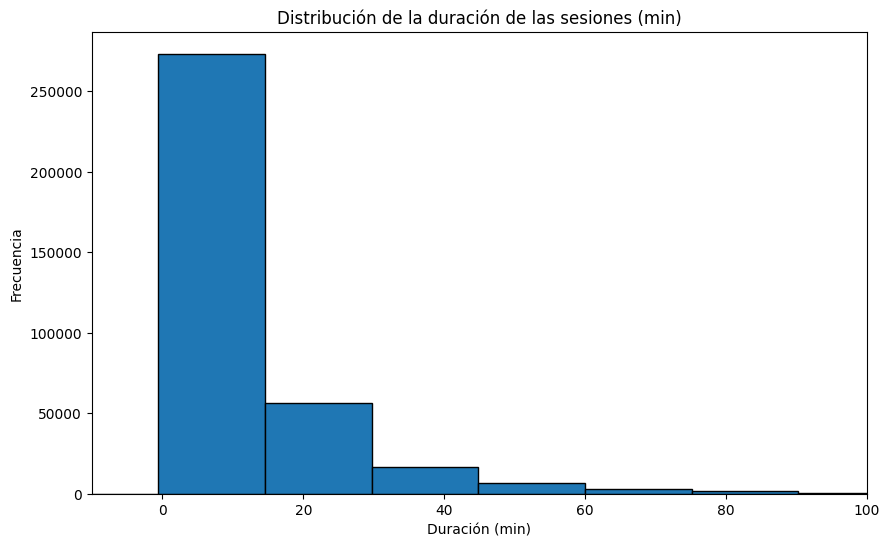

In [15]:
# Calcular la duración de la sesión en minutos
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60
visits['session_duration'].plot(kind='hist',
                               bins=50,
                               title='Distribución de la duración de las sesiones (min)',
                               figsize=(10,6),
                               edgecolor='black')
plt.xlim(-10, 100)
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')

La mayoria de las sesiones no pasa de los 20 minutos lo cual quiere decir que esta bien, ya que para comprar boletos no necestas casi mas de 10 minutos, en lo que llenas datos, eliges lugar y pagas, puede habalar de algun buen funcionamaiento de la pagina, malo que las sesiones duraran mas de 20 minutos, esto quiere decir que algo no esta funcionando bien dentro de la pagina, aun asi hay sesiones que duran hasta 100 minutos osea mas de una hora y media, se tendria que revisar porque, tal vez los clientes estaba indecisos de que lugar comprar, mas que nada checar que no sea un mal funcionamiento de la pogina 

¿Con qué frecuencia los usuarios regresan?

In [16]:
visits_sorted = visits.sort_values(by=['Uid', 'Start Ts'])
visits_sorted['prev_visit'] = visits_sorted.groupby('Uid')['Start Ts'].shift(1)
visits_sorted['days_since_last'] = (visits_sorted['Start Ts'] - visits_sorted['prev_visit']).dt.days
display(visits_sorted[['Uid', 'Start Ts', 'prev_visit', 'days_since_last']].head(10))



,Uid,Start Ts,prev_visit,days_since_last
196543,11863502262781,2018-03-01 17:27:00,NaT,NaN
257333,49537067089222,2018-02-06 15:55:00,NaT,NaN
173818,297729379853735,2017-06-07 18:47:00,NaT,NaN
173142,313578113262317,2017-09-18 22:49:00,NaT,NaN
192554,313578113262317,2018-02-18 15:17:00,2017-09-18 22:49:00,152.0
113873,313578113262317,2018-03-11 17:23:00,2018-02-18 15:17:00,21.0
34588,325320750514679,2017-09-30 14:29:00,NaT,NaN
41778,325320750514679,2018-02-26 12:33:00,2017-09-30 14:29:00,148.0
188450,397399764396656,2018-01-18 12:32:00,NaT,NaN
183750,407573351275847,2017-06-17 13:40:00,NaT,NaN


Text(0.5, 0, 'Días entre visitas')

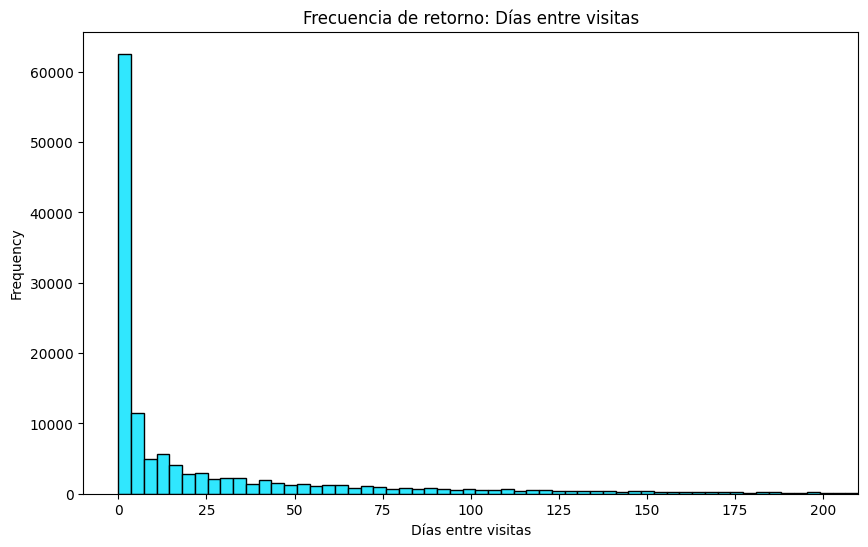

In [17]:
visits_sorted['days_since_last'].dropna().plot(kind='hist',
                               bins=100,
                               title='Frecuencia de retorno: Días entre visitas',
                               figsize=(10,6),
                               edgecolor='black',
                               color='#30e7fe')
plt.xlim(-10, 210)
plt.xlabel('Días entre visitas')

<div class="alert alert-block alert-success">
<b>Celdas [12–17]</b> <a class="tocSkip"></a><br>
Excelente el análisis de comportamiento de visitas: segmentaste por día, semana y mes, y luego exploraste la duración de sesiones y la frecuencia de retorno con visualizaciones claras. El histograma de `days_since_last` muestra un uso eficaz del agrupamiento por usuario para calcular el tiempo entre visitas, lo que permite entender la recurrencia de los usuarios.
</div>


el pico esta dentro de los primeros 3 dias, esto quiere decir que los usuarios visitas varias veces el sitio dentro de estos dias, esto puede ser por igual estan poniendose de acuerdo con amigos, validado precios, checando la disponibilidad de asientos, etc. Por otro lado tambien se puede concluir que es un producto con ciclo corto es decir que los usuarios entran compran sus boletos y probablemente no vuelvan hasta el proximo evento de interes que puede ser dentro de meses, esto tambien le da sentido porque hay usuarios que vuelven despues de incluso mas de 200 dias

### Ventas


¿Cuándo empieza la gente a comprar? 

In [18]:
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index().rename(columns={'Start Ts': 'first_visit'})

first_order = orders.groupby('Uid')['Buy Ts'].min().reset_index().rename(columns={'Buy Ts': 'first_order'})

#unir ambas 
df_merge = pd.merge(first_visit, first_order, on='Uid', how='inner')
df_merge['conversion_days'] = (df_merge['first_order']-df_merge['first_visit']).dt.days

print('El tiempo de conversion de algunos usuarios: ')
df_merge.sample(10)

El tiempo de conversion de algunos usuarios: 


,Uid,first_visit,first_order,conversion_days
29162,14711149659173390190,2017-10-21 14:35:00,2017-10-21 17:51:00,0
30192,15222689094929313933,2017-07-14 21:46:00,2017-07-14 21:53:00,0
4658,2343057119579720852,2018-02-12 20:33:00,2018-02-21 15:10:00,8
11199,5622049874643579415,2017-11-23 20:41:00,2017-11-24 18:01:00,0
18665,9453986079019411660,2017-11-01 16:37:00,2018-04-08 11:02:00,157
7404,3748436049215649206,2018-03-22 14:33:00,2018-03-26 21:45:00,4
35765,18046526478864491368,2017-12-18 09:27:00,2017-12-18 10:19:00,0
8254,4155326648280172160,2018-03-07 17:09:00,2018-03-07 17:12:00,0
8459,4262370012719911793,2017-11-10 16:21:00,2018-04-03 19:54:00,144
27921,14116472251236678364,2018-05-29 11:39:00,2018-05-29 13:41:00,0


<div class="alert alert-block alert-warning">
<b>Celda [18]</b> <a class="tocSkip"></a><br>
Muy buen enfoque al calcular los días hasta la conversión. Sin embargo, al restar `first_order - first_visit`, se usa `.dt.days`, que no se recomienda en una operación directa de resta; puedes usar simplemente `(first_order - first_visit).dt.days` sin necesidad del punto de ruptura, evitando confusiones. También sería útil graficar la distribución de conversiones acumuladas para complementar el histograma.
</div>


Text(0, 0.5, 'Cantidad de Usuarios')

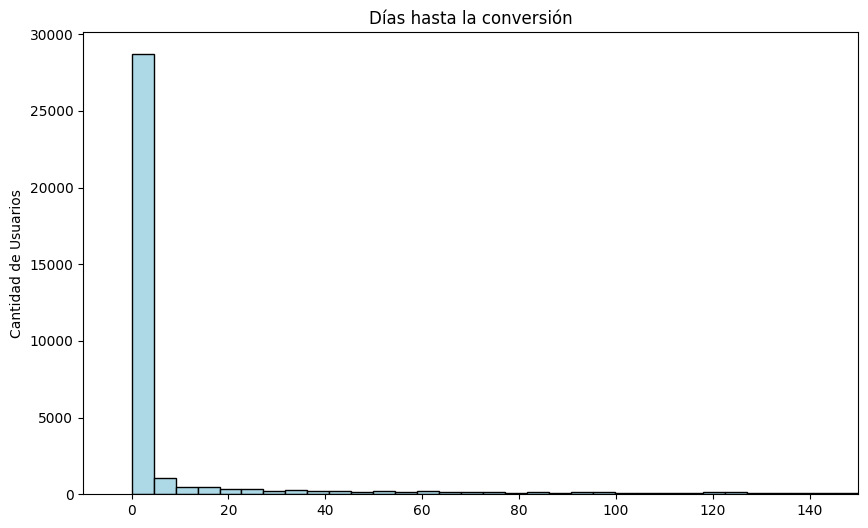

In [19]:
df_merge['conversion_days'].plot(kind='hist',
                               bins=80,
                               title='Días hasta la conversión',
                               figsize=(10,6),
                               edgecolor='black',
                               color='lightblue',
                                xlabel='Días')
plt.xlim(-10, 150)
plt.ylabel('Cantidad de Usuarios')

Conclusion la mayoria de la gente compra dentro de los primeros dias desde su primera visita, lo cual es algo positvvo

Pedidos por dia

El día con más pedidos fue 2017-11-24 con 814 pedidos.


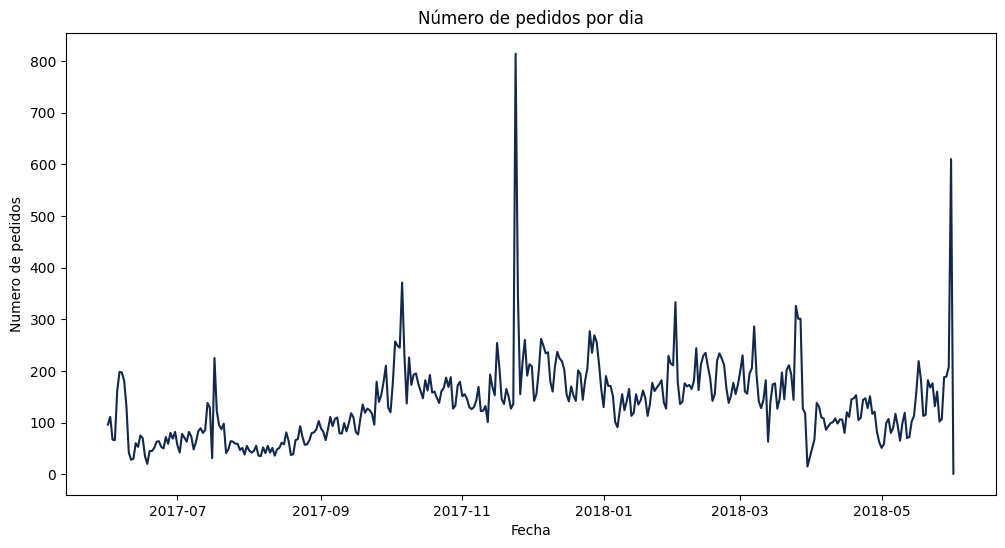

In [20]:
orders['order_date'] = orders['Buy Ts'].dt.date
orders_per_day = orders.groupby('order_date').size()


orders_per_day.plot(kind='line',
                    figsize=(12,6),
                    color='#12284c',
                    title='Número de pedidos por dia',
                    xlabel='Fecha',
                    ylabel='Numero de pedidos'
                   )


max_orders = orders_per_day.max()
max_day = orders_per_day.idxmax()  


print(f'El día con más pedidos fue {max_day} con {max_orders} pedidos.')


Pedidos por semana

La semana con más pedidos comenzo en 2017-11-20 con 1894 pedidos.


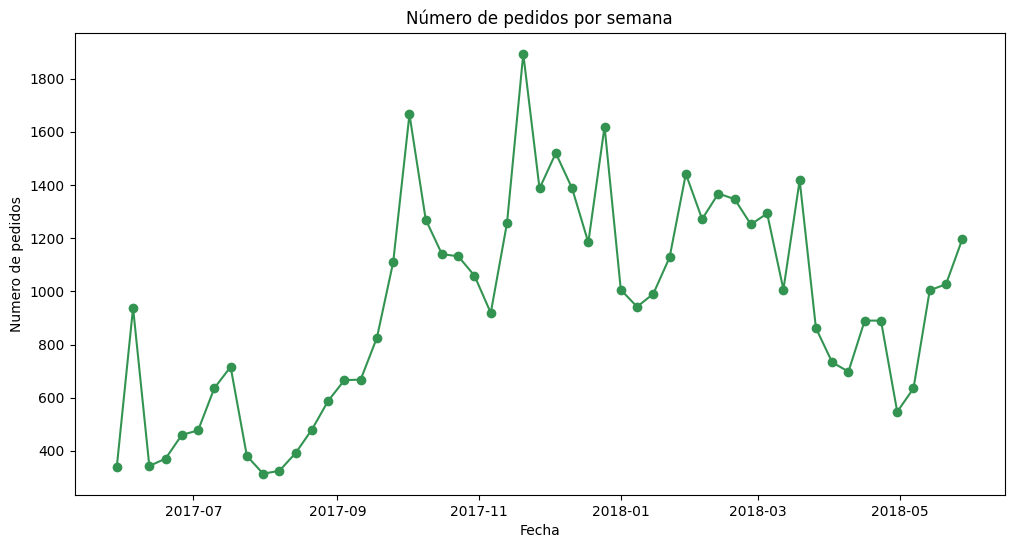

In [21]:
orders['order_week'] = orders['Buy Ts'].dt.to_period('W').dt.start_time.dt.date
orders_per_week = orders.groupby('order_week').size()

orders_per_week.plot(kind='line',
                    figsize=(12,6),
                     marker='o',
                    color='#339452',
                    title='Número de pedidos por semana',
                    xlabel='Fecha',
                    ylabel='Numero de pedidos'
                   )

max_orders = orders_per_week.max()
max_day = orders_per_week.idxmax()  


print(f'La semana con más pedidos comenzo en {max_day} con {max_orders} pedidos.')

Pedidos por mes

El mes con más pedidos fue 2017-12 con 6218 pedidos.


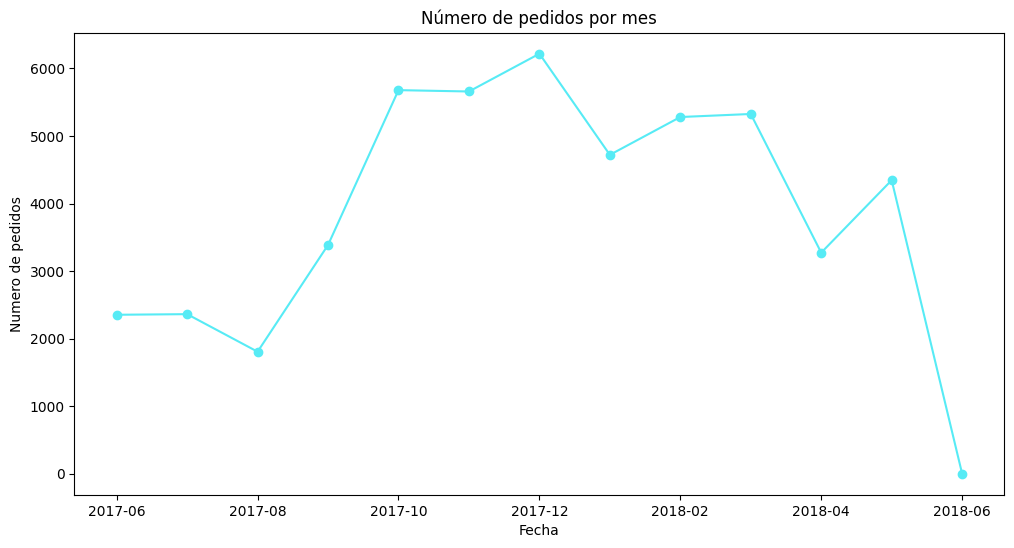

In [68]:
#Calcular visitas por mes 
orders['order_month'] = orders['Buy Ts'].dt.to_period('M').astype(str)
orders_per_month =  orders.groupby('order_month').size()

orders_per_month.plot(kind='line',
                    figsize=(12,6),
                     marker='o',
                    color='#57ebf5',
                    title='Número de pedidos por mes',
                    xlabel='Fecha',
                    ylabel='Numero de pedidos')

max_month = orders_per_month.idxmax()
max_month_orders = orders_per_month.max()

print(f"El mes con más pedidos fue {max_month} con {max_month_orders} pedidos.")

el pico de ventas fue entre octubre 2017 al diciembre 2017 donde se registraron en estos meses el mayor numero d ventas de ahi fueron bajando otra vez

¿Cuál es el tamaño promedio de compra?

In [23]:
#Calcular el tamaño promedio de la compra en revenue
orders_per_order = orders.groupby('Uid')['Revenue'].sum()
avg= orders_per_order.mean()
print(f"Tamaño promedio de compra es de: ${avg:.2f}")


#Calcular el tamaño promedio de la compra en numero de articulos
avg_items_per_order = orders.groupby('Uid').size().mean()
print(f"Tamaño promedio de compra (artículos): {avg_items_per_order:.2f}")

Tamaño promedio de compra es de: $6.90
Tamaño promedio de compra (artículos): 1.38


<div class="alert alert-block alert-success">
<b>Celdas [20–23]</b> <a class="tocSkip"></a><br>
Tu análisis del comportamiento de ventas está bien estructurado y aprovechas agrupamientos por fecha con gráficas de línea muy claras. Además, el cálculo del ticket promedio y tamaño de compra por artículos es acertado, y complementa de forma útil la exploración de ingresos.
</div>


¿Cuánto dinero traen? (LTV)

In [24]:
orders.head()
#calcular LTV
ltv = orders.groupby("Uid")["Revenue"].sum().reset_index()
ltv.columns = ["Uid", "LTV"]
print('ALgunos LTV por usuario: ')
display(ltv.head(10))

average_ltv = ltv["LTV"].mean()
print(f"LTV promedio: ${average_ltv:.2f}")



ALgunos LTV por usuario: 


,Uid,LTV
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99
5,3077748354309989,4.67
6,3605148382144603,0.69
7,3753586865891862,3.50
8,4808417689019433,1.22
9,4992223027560440,3.05


LTV promedio: $6.90


### Marketing


¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 

In [25]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [26]:
total_cost = costs['costs'].sum()
print(f"El costo total de publicidad fue de: ${total_cost}")

El costo total de publicidad fue de: $329131.62


source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64


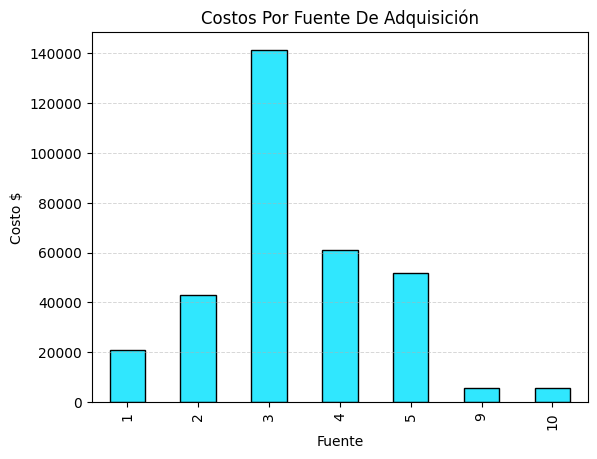

In [27]:
cost_source = costs.groupby('source_id')['costs'].sum()
print(cost_source)
cost_source.plot(kind='bar',
                title= 'Costos Por Fuente De Adquisición',
                xlabel='Fuente',
                ylabel='Costo $',
                edgecolor='black',
                color='#30e7fe',
                )

plt.grid(
    axis="y",         
    linestyle="--",   
    linewidth=0.7,    
    alpha=0.5         
)


 ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


In [29]:
# Suponemos que la fuente de adquisición de cada usuario es la de su primer registro
user_source = visits.sort_values(by='Start Ts').groupby('Uid').first().reset_index()[['Uid', 'Source Id']]
user_source.head()

,Uid,Source Id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [31]:
df_merge.head()

,Uid,first_visit,first_order,conversion_days
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


In [34]:
#unir ambos df
conversion_source = pd.merge( df_merge,user_source, on='Uid', how='left')
conversion_source

,Uid,first_visit,first_order,conversion_days,Source Id
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0,5
...,...,...,...,...,...
36518,18445147675727495770,2017-08-20 13:30:00,2017-11-24 09:03:00,95,5
36519,18445407535914413204,2017-09-22 23:48:00,2017-09-22 23:55:00,0,3
36520,18445601152732270159,2017-08-07 11:51:00,2018-03-26 22:54:00,231,2
36521,18446156210226471712,2017-11-07 10:01:00,2018-02-18 19:34:00,103,3


In [36]:
#clientes adquiridos por fuente 
clients_source = conversion_source.groupby('Source Id')['Uid'].nunique()
print('Numero de clientes adquiridos por fuente: ')
clients_source

Numero de clientes adquiridos por fuente: 


Source Id
1      2899
2      3506
3     10473
4     10296
5      6931
7         1
9      1088
10     1329
Name: Uid, dtype: int64

In [44]:
# calcular costo de adquisición por cliente 
cac = (cost_source/clients_source).dropna().round(2)
cac

1      7.19
2     12.21
3     13.49
4      5.93
5      7.47
9      5.07
10     4.38
dtype: float64

Calcular el ROMI (Return on Marketing Investment)

In [52]:
orders_source = pd.merge(orders, user_source, on='Uid', how='left')
orders_source = orders_source[['Uid','Buy Ts', 'Revenue', 'Source Id']]
orders_source

,Uid,Buy Ts,Revenue,Source Id
0,10329302124590727494,2017-06-01 00:10:00,17.00,1
1,11627257723692907447,2017-06-01 00:25:00,0.55,2
2,17903680561304213844,2017-06-01 00:27:00,0.37,2
3,16109239769442553005,2017-06-01 00:29:00,0.55,2
4,14200605875248379450,2017-06-01 07:58:00,0.37,3
...,...,...,...,...
50410,12296626599487328624,2018-05-31 23:50:00,4.64,4
50411,11369640365507475976,2018-05-31 23:50:00,5.80,10
50412,1786462140797698849,2018-05-31 23:54:00,0.30,3
50413,3993697860786194247,2018-05-31 23:56:00,3.67,3


In [58]:
#clacular ingreso por fuente 
revenue_source = orders_source.groupby('Source Id')['Revenue'].sum()
revenue_source = revenue_source[revenue_source > 2] # se elimina el 7 
revenue_source

Source Id
1     31090.55
2     46923.61
3     54511.24
4     56696.83
5     52624.02
9      5759.40
10     4450.33
Name: Revenue, dtype: float64

In [61]:
#calcular romi = (ingresos - gasto) / gasto
romi = (revenue_source - cost_source) / cost_source
print("El ROMI por fuente de adquisición es:")
romi

El ROMI por fuente de adquisición es:


Source Id
1     0.492351
2     0.096191
3    -0.614275
4    -0.071664
5     0.016750
9     0.043844
10   -0.235665
dtype: float64

<div class="alert alert-block alert-success">
<b>Celdas [25–61]</b> <a class="tocSkip"></a><br>
Muy completo tu bloque de marketing: calculaste correctamente los costos por fuente, uniste las tablas para obtener la fuente de adquisición de cada usuario y estimaste CAC y ROMI con precisión. La visualización final es muy útil para decisiones de negocio. También es positivo que identifiques fuentes con rendimiento negativo y propongas medidas.
</div>


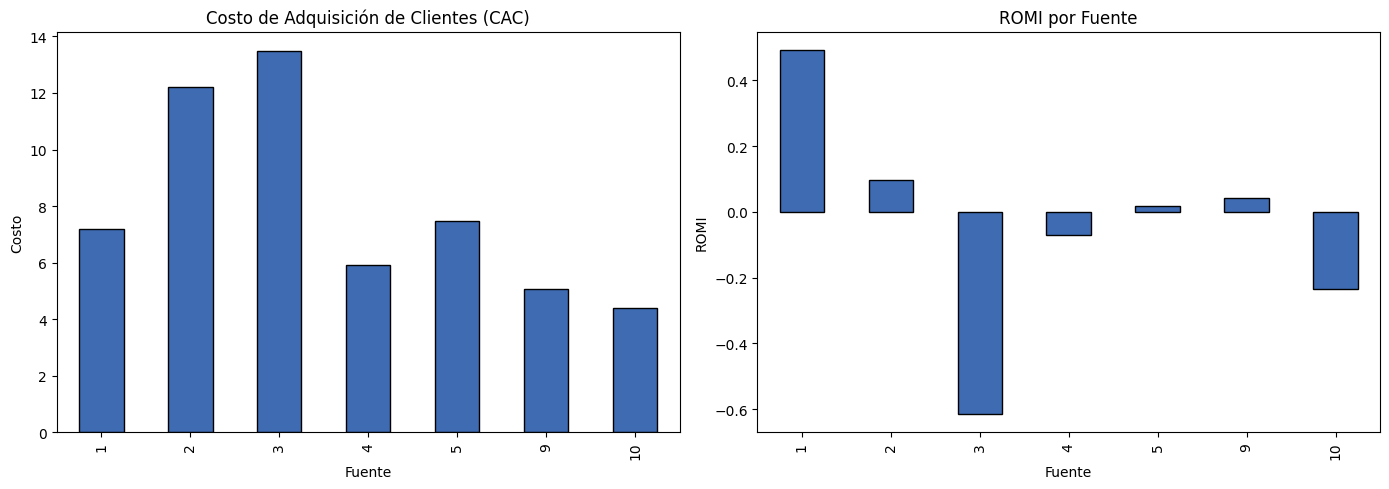

In [64]:
#graficar 
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

cac.plot(kind='bar', ax=ax[0], edgecolor='black', color='#3f6bb2')
ax[0].set_title('Costo de Adquisición de Clientes (CAC)')
ax[0].set_xlabel('Fuente')
ax[0].set_ylabel('Costo')

romi.plot(kind='bar', ax=ax[1], edgecolor='black', color="#3f6bb2")
ax[1].set_title('ROMI por Fuente')
ax[1].set_xlabel('Fuente')
ax[1].set_ylabel('ROMI')

plt.tight_layout()
plt.show()

Conclusion: definitivamente la fuente 1 es la mas rentable ya que no cuesta tanto en adquisision es la que mas romi da cerca del .5 esto quiere decir que por cada dólar invertido, casi se recupera la mitad. Las fuentes 2 y 3 cuestan mucho en adquirir y la 2 apenas da retorno, donde deberia pausar la estrategia por completo es el 3 ya que su cac es altisimo y su romi negativo llegando a 6 esto quiere decir que estan perdiendo $0.6 dolares por cada dolar invertido. El 4 el cac no es tan alto pero el romi negativo no tanto como el 3 pero se sigue perdiendo dinero, el 5 

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Excelente trabajo, Rodrigo! Tu análisis es profundo, bien estructurado y lleno de insights valiosos. Destaca tu manejo de fechas, visualizaciones limpias, y tu capacidad para conectar los resultados con decisiones estratégicas como optimizar canales de adquisición.¡Sigue así, vas muy bien!
</div>
